In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json, pdb
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

# set up pascal dataset

In [12]:
PATH = Path('./data/pascal/2007/')

In [13]:
TRAIN_PATH = 'train/VOCdevkit/VOC2007/JPEGImages/'
TEST_PATH = 'test/VOCdevkit/VOC2007/JPEGImages/'
JSON_PATH='PASCAL_VOC'

In [14]:
trn_j = json.load((PATH/JSON_PATH/'pascal_train2007.json').open())

In [15]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'


In [40]:
cats = dict((o[ID], o['name']) for o in trn_j[CATEGORIES])
trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])
trn_ids = [o[ID] for o in trn_j[IMAGES]]

#JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [67]:
IMG_PATH = (PATH/TRAIN_PATH)

In [68]:
!ls {PATH/TRAIN_PATH} | wc

   9963    9963  109593


In [69]:
print(PATH)
print(TRAIN_PATH)
print(IMG_PATH)
print(PATH/TRAIN_PATH)

data/pascal/2007
train/VOCdevkit/VOC2007/JPEGImages/
data/pascal/2007/train/VOCdevkit/VOC2007/JPEGImages
data/pascal/2007/train/VOCdevkit/VOC2007/JPEGImages


In [70]:
!ls {IMG_PATH} | wc

   9963    9963  109593


In [71]:
IMG_PATH

PosixPath('data/pascal/2007/train/VOCdevkit/VOC2007/JPEGImages')

In [72]:
cats = dict((o[ID], o['name']) for o in trn_j[CATEGORIES])
trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])
trn_ids = [o[ID] for o in trn_j[IMAGES]]


In [73]:
trn_j['annotations'][0]

{'area': 34104,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0,
 'image_id': 12,
 'iscrowd': 0,
 'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]}

In [74]:
trn_j['categories'][0]

{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'}

In [75]:
def get_trn_anno():
    trn_anno = collections.defaultdict(lambda:[])
    for o in trn_j[ANNOTATIONS]:
        if not o['ignore']:
            bb = o[BBOX]
            bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
            trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
    return trn_anno

trn_anno = get_trn_anno()

In [76]:
list(trn_anno.values())[0]

[(array([ 96, 155, 269, 350]), 7)]

In [77]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.set_xticks(np.linspace(0, 224, 8))
    ax.set_yticks(np.linspace(0, 224, 8))
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    return ax

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [78]:

def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    draw_im(im, im_a)

In [80]:
(IMG_PATH/trn_fns[12])

PosixPath('data/pascal/2007/train/VOCdevkit/VOC2007/JPEGImages/000012.jpg')

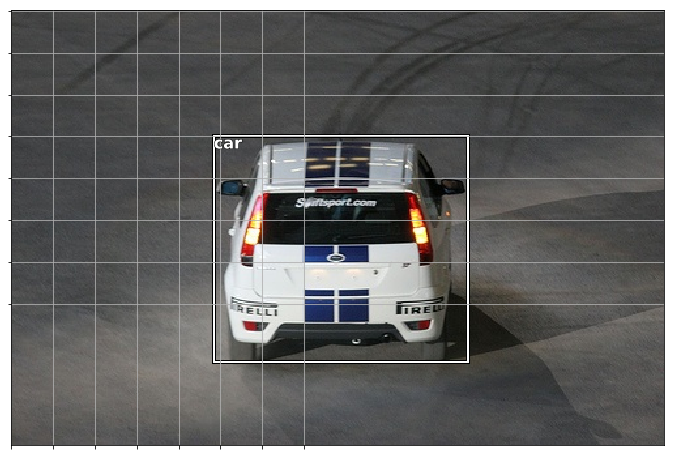

In [81]:
draw_idx(12)

# Multi class

In [82]:
MC_CSV = PATH/'tmp/mc.csv'

In [84]:
trn_anno[12]

[(array([ 96, 155, 269, 350]), 7)]

In [87]:
mc = [
    set([cats[p[1]] for p in trn_anno[o]]) for o in trn_ids
]


In [94]:
mcs =[' '.join(str(p) for p in o) for o in mc]

In [95]:
mcs[12]

'bird person'

In [97]:
df = pd.DataFrame({'fn':[trn_fns[o] for o in trn_ids], 'clas':mcs}, 
                 columns=['fn, clas'])

In [99]:
df.to_csv(MC_CSV, index = False)

In [100]:
f_model = resnet34

In [109]:
inception_stats

[array([ 0.5,  0.5,  0.5]), array([ 0.5,  0.5,  0.5])]

In [101]:
sz = 224
bs = 64

In [103]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO)

In [106]:
tfms[0]

In [ ]:
tfms = tfms_from_model